In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score, matthews_corrcoef

In [11]:
csv_in = 'ai-end1-1.csv'

In [12]:
df = pd.read_csv(csv_in, delimiter=';', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(100, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   99 non-null     float64
 1   A       100 non-null    float64
 2   B       100 non-null    float64
 3   C       100 non-null    float64
dtypes: float64(4)
memory usage: 3.2 KB
None


,label,A,B,C
0,0.0,0.766674,0.288116,0.794239
1,0.0,0.155695,0.516177,0.752588
2,1.0,0.655567,0.969178,0.227411
3,1.0,0.682994,0.962953,0.746909
4,1.0,0.810853,0.895760,0.786368


In [13]:
display(df[df.isnull().any(axis=1)])

,label,A,B,C
10,NaN,0.272235,0.408546,0.699017


In [14]:
df = df.dropna().reset_index(drop=True)
print(df.shape)
display(df.head())

(99, 4)


,label,A,B,C
0,0.0,0.766674,0.288116,0.794239
1,0.0,0.155695,0.516177,0.752588
2,1.0,0.655567,0.969178,0.227411
3,1.0,0.682994,0.962953,0.746909
4,1.0,0.810853,0.895760,0.786368


In [15]:
print('A')
print('precision:', precision_score(df['label'], df['A']>=0.5))
print('recall:', recall_score(df['label'], df['A']>=0.5))
print('accuracy(Q2):', accuracy_score(df['label'], df['A']>=0.5))
print('f1:', f1_score(df['label'], df['A']>=0.5))
print('matthews:', matthews_corrcoef(df['label'], df['A']>=0.5))
#predA = (df['A']>=0.5).astype('int')
predA = df['A'].map(lambda x: 1 if x >= 0.5 else 0)
ctA = pd.crosstab(df['label'], predA)
fpA = ctA.loc[0,1]
tnA = ctA.loc[0,0]
print('false positive rate:', fpA/(fpA+tnA))
display(ctA)

A
precision: 0.704225352112676
recall: 1.0
accuracy(Q2): 0.7878787878787878
f1: 0.8264462809917354
matthews: 0.6343614796955512
false positive rate: 0.42857142857142855


A,0,1
label,,
0.0,28,21
1.0,0,50


In [16]:
print('B')
print('precision:', precision_score(df['label'], df['B']>=0.5))
print('recall:', recall_score(df['label'], df['B']>=0.5))
print('accuracy(Q2):', accuracy_score(df['label'], df['B']>=0.5))
print('f1:', f1_score(df['label'], df['B']>=0.5))
print('matthews:', matthews_corrcoef(df['label'], df['B']>=0.5))
#predB = (df['B']>=0.5).astype('int')
predB = df['B'].map(lambda x: 1 if x >= 0.5 else 0)
ctB = pd.crosstab(df['label'], predB)
fpB = ctB.loc[0,1]
tnB = ctB.loc[0,0]
print('false positive rate:', fpB/(fpB+tnB))
print('specificity:', tnB/(fpB+tnB))
display(ctB)

B
precision: 0.6666666666666666
recall: 1.0
accuracy(Q2): 0.7474747474747475
f1: 0.8
matthews: 0.5714285714285714
false positive rate: 0.5102040816326531
specificity: 0.4897959183673469


B,0,1
label,,
0.0,24,25
1.0,0,50


In [17]:
print('C')
print('precision:', precision_score(df['label'], df['C']>=0.5))
print('recall:', recall_score(df['label'], df['C']>=0.5))
print('accuracy(Q2):', accuracy_score(df['label'], df['C']>=0.5))
print('f1:', f1_score(df['label'], df['C']>=0.5))
print('matthews:', matthews_corrcoef(df['label'], df['C']>=0.5))
#predC = (df['C']>=0.5).astype('int')
predC = df['C'].map(lambda x: 1 if x >= 0.5 else 0)
ctC = pd.crosstab(df['label'], predC)
fpC = ctC.loc[0,1]
tnC = ctC.loc[0,0]
print('false positive rate:', fpC/(fpC+tnC))
display(ctC)

C
precision: 0.6164383561643836
recall: 0.9
accuracy(Q2): 0.6666666666666666
f1: 0.7317073170731706
matthews: 0.37330579706768746
false positive rate: 0.5714285714285714


C,0,1
label,,
0.0,21,28
1.0,5,45


In [18]:
y_true = df['label']
y_score = df['A']
fprA, tprA, thresholdsA = roc_curve(y_true, y_score)
print('AUC(A):', roc_auc_score(y_true, y_score))
#print('AUC(A):', auc(fprA, tprA))  # from fpr and tpr
y_score = df['B']
fprB, tprB, thresholdsB = roc_curve(y_true, y_score)
print('AUC(B):', roc_auc_score(y_true, y_score))
#print('AUC(B):', auc(fprB, tprB))  # from fpr and tpr
y_score = df['C']
fprC, tprC, thresholdsC = roc_curve(y_true, y_score)
print('AUC(C):', roc_auc_score(y_true, y_score))
#print('AUC(C):', auc(fprC, tprC)) # from fpr and tpr

AUC(A): 0.8910204081632653
AUC(B): 0.9991836734693877
AUC(C): 0.7706122448979592


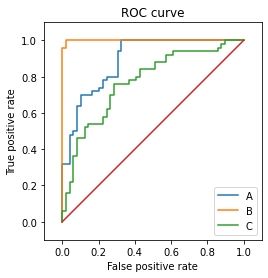

In [19]:
plt.plot(fprA, tprA, label='A')
plt.plot(fprB, tprB, label='B')
plt.plot(fprC, tprC, label='C')
plt.plot([0,1],[0,1])
plt.gca().set_aspect('equal', adjustable='box')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.legend()
plt.show()